In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from numpy import where, exp, log, arctan, tanh, maximum
from scipy.special import erf

functions = {
    'linear':    lambda x: x,                                          # 
    'step':      lambda x: where(x!=0, where(x>0,1,0), 0.5),           # Heaviside 
    'sign':      lambda x: where(x!=0, where(x>0,+1,-1), 0.0),         # Signum
    'sigmoid':   lambda x: 1 / (1 + exp(-x)),                          # Logistic
    'arctan':    lambda x: arctan(x),                                  # 
    'tanh':      lambda x: tanh(x),                                    # 
    'relu':      lambda x: where(x>0, x, 0), # maximum(x, 0.0)         # Rectified Linear Units (ReLU)
    'leakyrelu': lambda x: where(x>0, x, 0.1*x),                       # Leaky ReLU, PReLU with fix α
    'silu':      lambda x: x / (1 + exp(-x)),                          # Sigmoid Linear Unit (SiLU), same as swish with β=1
    'elu':       lambda x: where(x>0, x, 1.0*(exp(x)-1)),              # Exponential Linear Unit (ELU), mean closer to 0
    'gelu':      lambda x: x * 0.5 * (1 + erf(x/2**0.5)),              # Gaussian Error Linear Unit (GELU)
    'selu':      lambda x: where(x>0, 1.0507*x, 1.0507*1.6733*(exp(x)-1)),  # Scaled Exponential Linear Unit (SELU), self-normalizing
    'softplus':  lambda x: log(1+exp(x)),                              # strictly positive range
    'smht':      lambda x: (exp(1*x)-exp(-1*x))/(exp(1*x)+exp(-2*x)),  # Soboleva Modified Hyperbolic Tangent (SMHT), a=b=c=1, d=2
    'gaussian':  lambda x: exp(-x**2),                                 #
}

In [8]:
np.random.uniform?

In [6]:
shape = (1,2,3)
np.random.randn(*shape)

array([[[-0.70416815,  0.28669519, -1.34392354],
        [ 0.03080364,  0.0997721 ,  0.48660368]]])

array([[[ 1.05606516,  0.11221863,  0.4734754 ],
        [-0.95879509,  0.49719564, -2.53462913]]])

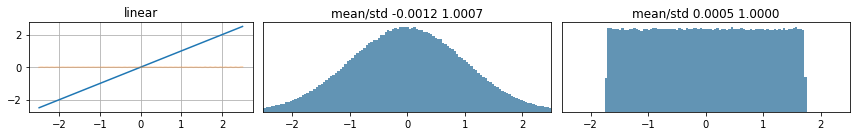

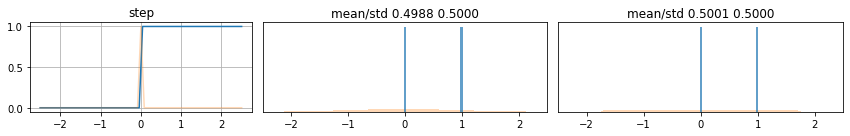

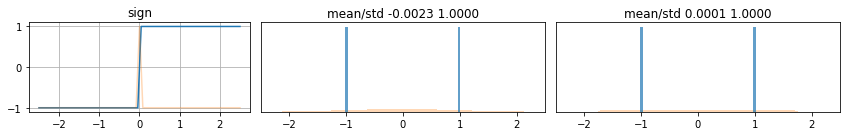

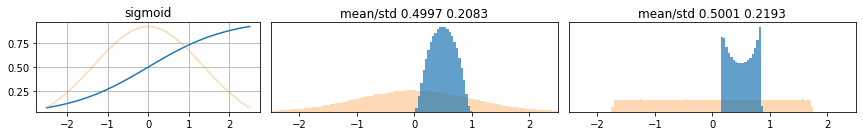

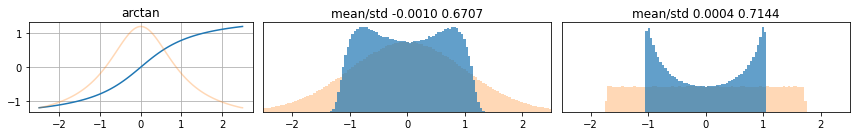

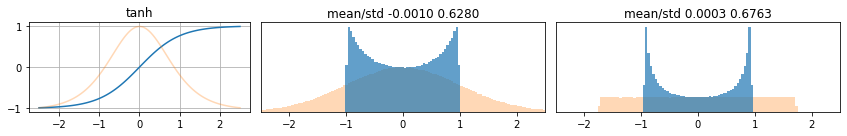

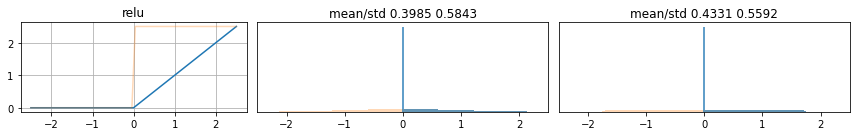

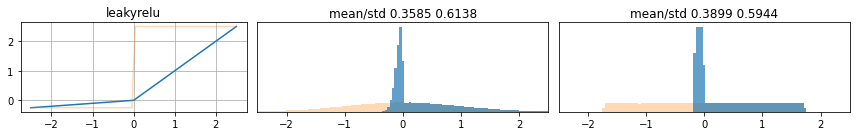

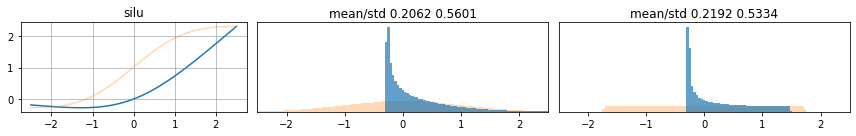

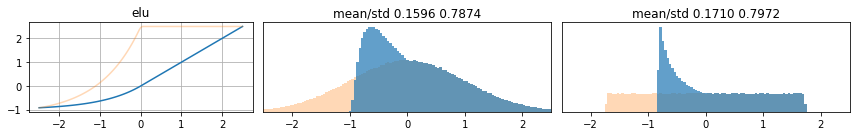

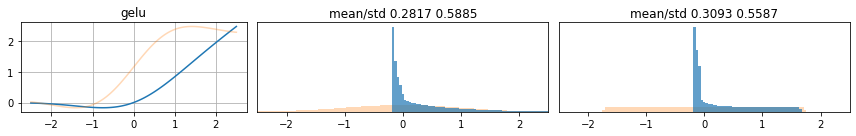

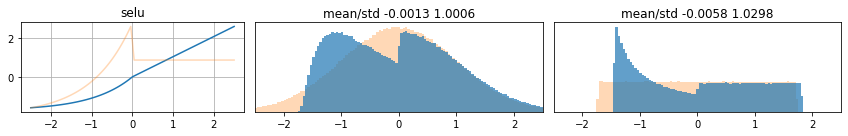

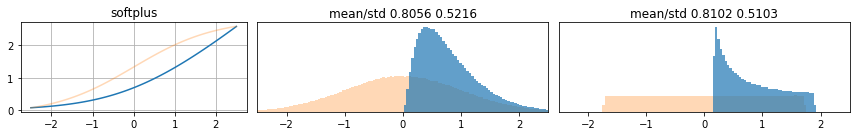

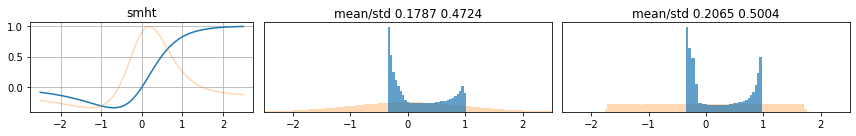

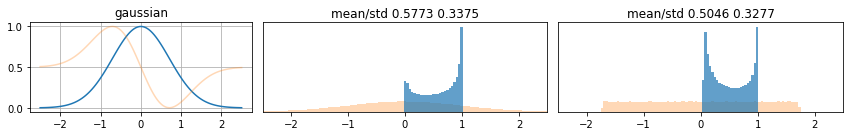

In [3]:
# Plots
#    1. Activation function with derivative (orange)
#    2. Normal distributon before (orange) and after activation
#    3. Uniform distributon before (orange) and after activation 

k = 2.5
bins = 121

a1 = np.random.randn(1000000)
a2 = np.random.uniform(-3**0.5, 3**0.5, 1000000)
x = np.linspace(-k,+k, bins)

for n, f in functions.items():
    fig, axs = plt.subplots(1,3, figsize=(12,2), gridspec_kw={'width_ratios':[1.4,1.8,1.8]})
    
    ax1 = axs[0]; ax1.plot(x, f(x), 'tab:blue', alpha=1.0); ax1.set_title(n)
    ax2 = ax1.twinx(); ax2.plot(x, np.gradient(f(x)), 'tab:orange', alpha=0.3)
    ax1.grid(); ax2.axis(False); ax2.get_yaxis().set_ticks([])
    
    a, b = a1, f(a1)
    ax1 = axs[1]
    ax1.hist(a, bins=bins, range=(-k,+k), color='tab:orange', alpha=0.3)
    ax1.hist(b, bins=bins, range=(-k,+k), color='tab:blue', alpha=0.7)
    ax1.set_title('mean/std %.4f %.4f'%(np.mean(b), np.std(b)))
    ax1.set_yticks([]); ax1.set_xlim(-k,+k)

    a, b = a2, f(a2)
    ax1 = axs[2]
    ax1.hist(a, bins=bins, range=(-k,+k), color='tab:orange', alpha=0.3)
    ax1.hist(b, bins=bins, range=(-k,+k), color='tab:blue', alpha=0.7)
    ax1.set_title('mean/std %.4f %.4f'%(np.mean(b), np.std(b)))
    ax1.set_yticks([]); ax1.set_xlim(-k,+k)
    
    plt.tight_layout()
    plt.show()

In [ ]:
k = 4
a = np.random.randn(1000000)
#a = np.random.uniform(-3**0.5, 3**0.5, 1000000)
x = np.linspace(-k,+k, 81)

for n, f in functions.items():
    b = f(a)
    plt.figure(figsize=(15,2))
    plt.subplot(1,6,1)
    plt.plot(x, f(x)); plt.title(n); plt.grid()
    for i, v in enumerate([a, b, b[a<0], b[a>0]]):
        plt.subplot(1,6,i+2); plt.hist(v, bins=101, range=(-k,+k)); plt.title('%.5f'%(np.mean(v))); plt.yticks([])
    plt.tight_layout()
    plt.show()